# MOOC Dataset

MOOC dataset was provided with the following features:
1.	Course_information.csv

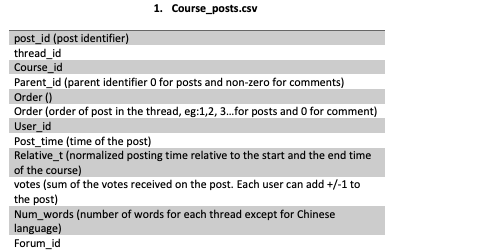

2.	Course_subforums.csv

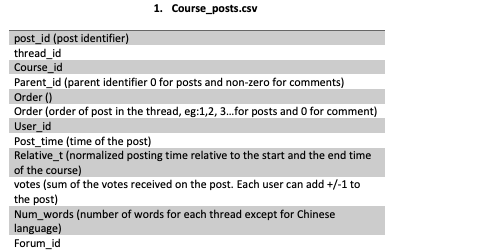

3.	Course_posts.csv

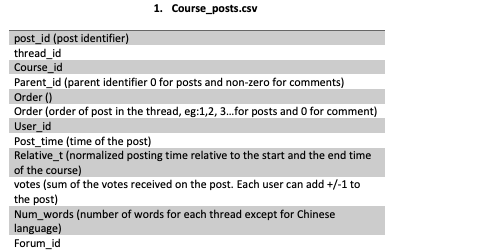

**About the data:**

•	The data has no text features in it therefore it’s impossible for one to extract features like internal links and external links as mentioned in the paper

•	The data has threads which contain posts and comments and the number of each can be extracted while preprocessing the data

•	The data has timestamp which shows the time of the post and the comments which can again be used to extract features like message rate and average response time

•	The data in insufficient to replicate the results shared by the author in the research paper

•	Since the data has no features which have the post, comments or messages in it the application gets limited as one cannot perform NLP to derive insights such as sentiment analysis



# The Stanford MOOCposts Dataset

- This dataset is rich in text and classifies posts and comments as questions, answers and opinion. 

- Each post has been  manually coded along six dimensions by three independent coders:
    - Is this post a question? (Yes/No)
    - Is this post an answer? (Yes/No)
    - Is this post an opinion? (Yes/No)
    - What sentiment does this post express? (1-7)
    - How much confusion does this post express? (1-7)
    - How urgent is it that this post be seen by an instructor? (1-7)

- data also specifies if the post or the comment is from an anonymous user
- The text rich data has been processed and personal information from each user of the forum has been eliminated by using appropriate replacements(example: < phoneRedac > for telephone number)
- The original dataset had 30,002 posts but after removing posts with missing scores have been removed therefore limiting the number of posts to be 29,604
- The data also provides link to additional demographic information which was not there in the previous data

In [151]:
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df = pd.read_excel("/Users/sumittatawat/Downloads/stanfordMOOCForumPostsSet/stanfordMOOCForumPostsSet.xlsx")

In [153]:
# checking the columns of the dataset 
df.columns

Index(['Text', 'Opinion(1/0)', 'Question(1/0)', 'Answer(1/0)',
       'Sentiment(1-7)', 'Confusion(1-7)', 'Urgency(1-7)', 'CourseType',
       'forum_post_id', 'course_display_name', 'forum_uid', 'created_at',
       'post_type', 'anonymous', 'anonymous_to_peers', 'up_count',
       'comment_thread_id', 'reads'],
      dtype='object')

In [154]:
df['weekday'] = df.created_at.dt.day_name()
df.post_type.value_counts()

Comment          17298
CommentThread    12287
Name: post_type, dtype: int64

In [155]:
df['CourseType'].value_counts()

Medicine      10001
Education      9878
Humanities     9723
Name: CourseType, dtype: int64

In [165]:
# making changes to data types as per the dataset description

df['Opinion(1/0)'] = df['Opinion(1/0)'].astype('bool')
df['Question(1/0)'] = df['Question(1/0)'].astype('bool')
df['Answer(1/0)'] = df['Answer(1/0)'].astype('bool')
df['anonymous'] = df['anonymous'].astype('bool')


df['CourseType'] = df['CourseType'].astype('category')
df['post_type'] = df['post_type'].astype('category')
df.dtypes

Text                           object
Opinion(1/0)                     bool
Question(1/0)                    bool
Answer(1/0)                      bool
Sentiment(1-7)                float64
Confusion(1-7)                float64
Urgency(1-7)                  float64
CourseType                   category
forum_post_id                  object
course_display_name            object
forum_uid                      object
created_at             datetime64[ns]
post_type                    category
anonymous                        bool
anonymous_to_peers            float64
up_count                      float64
comment_thread_id              object
reads                         float64
weekday                        object
dtype: object

In [218]:
df.head(3)

,Text,Opinion(1/0),Question(1/0),Answer(1/0),Sentiment(1-7),Confusion(1-7),Urgency(1-7),CourseType,forum_post_id,course_display_name,forum_uid,created_at,post_type,anonymous,anonymous_to_peers,up_count,comment_thread_id,reads,weekday
0,Interesting! How often we say those things to ...,True,False,False,6.5,2.0,1.5,Education,5225177f2c501f0a00000015,Education/EDUC115N/How_to_Learn_Math,30CADB93E6DE4711193D7BD05F2AE95C,2013-09-02 22:55:59,Comment,False,0.0,0.0,5221a8262cfae31200000001,41.0,Monday
1,"What is \Algebra as a Math Game\"" or are you j...",False,True,False,4.0,5.0,3.5,Education,5207d0e9935dfc0e0000005e,Education/EDUC115N/How_to_Learn_Math,37D8FAEE7D0B94B6CFC57D98FD3D0BA5,2013-08-11 17:59:05,Comment,False,0.0,0.0,520663839df35b0a00000043,55.0,Sunday
2,I like the idea of my kids principal who says ...,True,False,False,5.5,3.0,2.5,Education,52052c82d01fec0a00000071,Education/EDUC115N/How_to_Learn_Math,CC11480215042B3EB6E5905EAB13B733,2013-08-09 17:53:06,Comment,False,0.0,0.0,51e59415e339d716000001a6,25.0,Friday


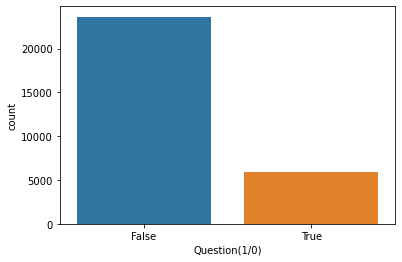

In [224]:
sns.countplot(df['Question(1/0)'])

Text(0.5, 1.0, 'Anonymous posts ')

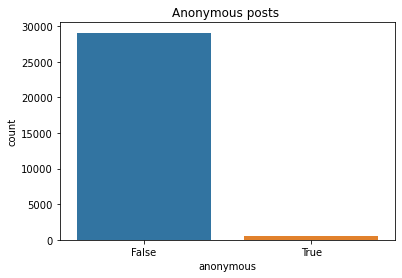

In [246]:
sns.countplot(df['anonymous'])
plt.title("Anonymous posts ")
# it can be noted that most posts are posted using unique user id and a 
                            #very small number of posts  belong under anonymous category

In [250]:
df.CourseType.value_counts()

Medicine      10001
Education      9878
Humanities     9723
Name: CourseType, dtype: int64

Text(0.5, 1.0, 'Distribution of course type')

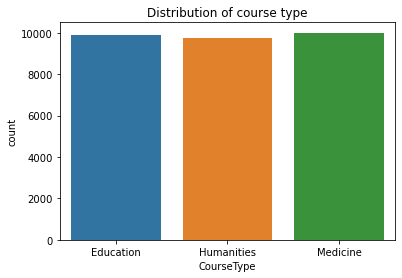

In [251]:
sns.countplot(df.CourseType)
plt.title("Distribution of course type")
# the highest enrolment is for the courses related to medicine and the least is for Humanities

## Sentiment:

- Extremely negative → 1
- Very negative → 2
- Somewhat negative → 3
- Neutral → 4
- Somewhat positive → 5
- Very positive → 6
- Extremely positive → 7

Text(0.5, 1.0, 'Sentiment distribution for posts')

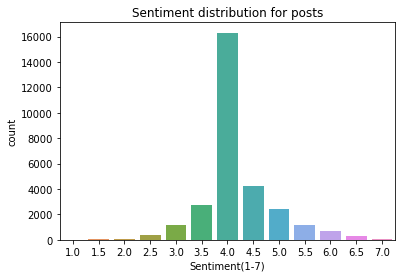

In [235]:
# Taking a closer look at the sentiments 

sns.countplot(df['Sentiment(1-7)'])
plt.title("Sentiment distribution for posts")

# the plot shows that the highest number of posts were Neutral

## Urgency:

- No reason to read the post → 1
- Not actionable; read if time → 2
- Not actionable; maybe interesting → 3
- Neutral: respond if spare time → 4
- Somewhat urgent: good idea to reply teaching assistant might suffice  → 5
- Very urgent: good idea for instructor to reply → 6    
- Extremely urgent: instructor definitely needs to reply → 7

Text(0.5, 1.0, ' Distribution of Urgency for the posts')

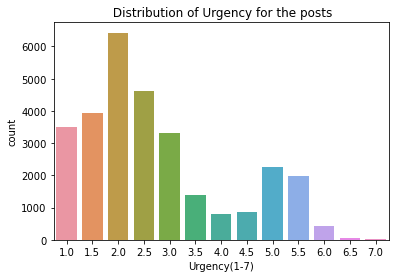

In [239]:
sns.countplot(df['Urgency(1-7)'])
plt.title(" Distribution of Urgency for the posts")

# The graph shows that majority of the posts were not actionable and can be dealt by just giving it a read in spare time.

## Confusion
Indicates an extent to which the author of the post chooses to expresses  their inability to understand the concept

- Extremely knowledgeable → 1
- Very knowledgeable → 2
- Somewhat knowledgeable → 3
- Neutral → 4
- Somewhat confused → 5
- Very confused → 6
- Extremely confused → 7

Text(0.5, 1.0, 'distribution for confusion variable')

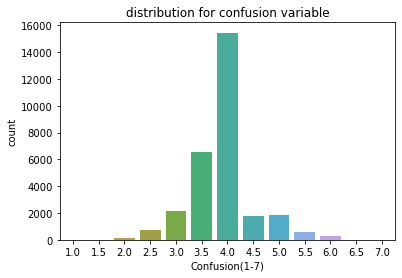

In [242]:
sns.countplot(df['Confusion(1-7)'])
plt.title("distribution for confusion variable")
#as per the countplot we can see mostly it was neutral 

In [217]:
# we are also provided with data related to demographics for the same

df_demo = pd.read_excel("/Users/sumittatawat/Downloads/stanfordMOOCForumPostsSet/stanfordMOOCForumPostsSetDemographics.xlsx")
df_demo.rename(columns={'Unnamed: 0': 'Course_type'}, inplace=True)
df_demo.head()

,Course_type,GenderF,GenderM,GenderO,GenderWithheld,EduElementary,EduJunHighSchool,EduHighSchool,EduAssocDeg,EduBachelors,EduMasters,EduPhD,EduOther,EduNone,EduWithheld,EduNotCollected
0,GlobalHealth/WomensHealth/Winter2014,5049,647,22,190,5,56,689,245,2278,2050,273,112,6,187,7
1,HumanitiesScience/StatLearning/Winter2014,10793,37124,92,5559,30,130,2522,603,15367,21827,7824,320,61,4703,181
2,HumanitiesScience/Stats216/Winter2014,9,25,0,258,0,0,6,0,16,9,3,0,0,12,246
3,HumanitiesSciences/EP101/Environmental_Physiology,5831,6416,31,1009,41,359,1768,523,4329,4198,894,232,24,894,25
4,HumanitiesSciences/Econ-1[+V]/Summer2014,6325,14782,53,1841,50,451,3396,681,8068,7126,1292,241,44,1549,78


In [208]:
df_demo.columns

Index(['Course_type', 'GenderF', 'GenderM', 'GenderO', 'GenderWithheld',
       'EduElementary', 'EduJunHighSchool', 'EduHighSchool', 'EduAssocDeg',
       'EduBachelors', 'EduMasters', 'EduPhD', 'EduOther', 'EduNone',
       'EduWithheld', 'EduNotCollected'],
      dtype='object')